In [5]:
#program 1
import csv
with open('data1.csv','r') as f:
    reader=csv.reader(f)
    headers=next(reader)
    your_list=list(reader)
h=[['0','0','0','0','0','0']]
for i in your_list:
    print(i)
    if i[-1]=="TRUE":
        j=0
        for x in i:
            if x!="TRUE":
                if x!=h[0][j] and h[0][j]=='0':
                    h[0][j]=x
                elif x!=h[0][j] and h[0][j]!='0':
                        h[0][j]='?'
                else:
                        pass
            j=j+1
print("the maximally hypthesus for the   trainning exampole is")
print(h)

['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'TRUE']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'TRUE']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'FALSE']
['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'TRUE']
the maximally hypthesus for the   trainning exampole is
[['sunny', 'warm', '?', 'strong', '?', '?']]


In [4]:
#program 2

import csv
with open("data.csv") as f:
    csv_file=csv.reader(f)
    data=list(csv_file)
    
    s=data[1][:-1]
    g=[['?' for i in range(len(s))] for j in range(len(s))]
    
    for i in data:
        if i[-1]=="yes":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    s[j]='?'
                    g[j][j]='?'
        
        elif i[-1]=="no":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    g[j][j]=s[j]
                else:
                    g[j][j]="?"
        print("\nSteps of Candidate Elimination Algorithm",data.index(i)+1)
        print(s)
        print(g)
    gh=[]
    for i in g:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    print("\nFinal specific hypothesis:\n",s)

    print("\nFinal general hypothesis:\n",gh)


Steps of Candidate Elimination Algorithm 1
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 3
['sunny', 'warm', '?', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 4
['sunny', 'warm', '?', 'strong', 'warm', 'same']
[['sunny', '?', '?', '?', '?', '?'], ['

Estimated coefficients:
b_0 = 1.2363636363636363 \ 
b_1 = 1.1696969696969697


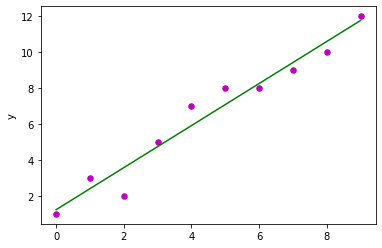

In [12]:
#program 3
import numpy as np 
import matplotlib.pyplot as plt 
def estimate_coef(x, y):
 # number of observations/points 
    n =np.size(x) 
# mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 # calculating cross-deviation and deviation aboutx 
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) -n*m_x*m_x 

# calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 
def plot_regression_line(x, y, b): 
# plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
 # predicted response vector 
    y_pred = b[0] + b[1]*x 
# plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
# putting labels plt.xlabel('x') 
    plt.ylabel('y')
# function to show plot
    plt.show() 
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 
    # plotting regression line 
    plot_regression_line(x, y, b) 

main() 

In [48]:
import math 
import csv
def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    headers = dataset.pop(0) 
    return dataset, headers

class Node: 
    def  __init__ (self, attribute):
        self.attribute = attribute 
        self.children = [] 
        self.answer = ""
# NULL indicates children exists.
# Not Null indicates this is a Leaf Node 
def subtables(data, col, delete):
    dic = {}
    coldata = [ row[col] for row in data]
    attr = list(set(coldata)) # All values of attribute retrived 
    for k in attr:
        dic[k] = []
    for y in range(len(data)):
        key = data[y][col]
        if delete:
            del data[y][col] 
        dic[key].append(data[y])
    return attr, dic 
def entropy(S):
    attr = list(set(S))
    if len(attr) == 1: #if all are +ve/-ve then entropy = 0 
        return 0
    counts = [0,0] # Only two values possible 'yes' or 'no'
    for i in range(2):
        counts[i] = sum( [1 for x in S if attr[i] == x] ) / (len(S) * 1.0) 
    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2) 
    return sums
def compute_gain(data, col):
    attValues, dic = subtables(data, col, delete=False) 
    total_entropy = entropy([row[-1] for row in data]) 
    for x in range(len(attValues)):
        ratio = len(dic[attValues[x]]) / ( len(data) * 1.0)
        entro = entropy([row[-1] for row in dic[attValues[x]]]) 
        total_entropy -= ratio*entro
    return total_entropy
def build_tree(data, features): 
    lastcol = [row[-1] for row in data]
    if (len(set(lastcol))) == 1: # If all samples have same labels return that 
        node=Node("")
        node.answer = lastcol[0] 
        return node
   
    n = len(data[0])-1
    gains = [compute_gain(data, col) for col in range(n) ]
    split = gains.index(max(gains)) # Find max gains and returns index 
    node = Node(features[split]) # 'node' stores attribute selected
    #
    del (features[split])
    fea = features[:split]+features[split+1:]
    attr, dic = subtables(data, split, delete=True) # Data will be spilt in subtables 
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node
def print_tree(node, level): 
    if node.answer != "":
        print(" "*level, node.answer) # Displays leaf node yes/no 
        return
    print(" "*level, node.attribute) # Displays attribute Name 
    for value, n in node.children:
        print(" "*(level+1), value) 
        print_tree(n, level + 2)
def classify(node,x_test,features): 
    if node.answer != "":
         print(node.answer)
         return   
        
    pos = features.index(node.attribute) 
    for value, n in node.children:
        if x_test[pos]==value: 
            classify(n,x_test,features)
    ''' Main program '''
dataset,features = load_csv("P3_data03.csv") # Read Tennis data 
node = build_tree(dataset,features) # Build decision tree 
print("The decision tree for the dataset using ID3 algorithm is ") 
print_tree(node, 0)

testdata, features = load_csv("P3_data3_test.csv") 

for xtest in testdata:
    print("The test instance : ",xtest) 
    print("The predicted label : ") 
    classify(node,xtest,features)
    
   

The decision tree for the dataset using ID3 algorithm is 
 Outlook
  Overcast
   Yes
  Rain
   PlayTennis
    Strong
     No
    Weak
     Yes
  Sunny
   Wind
    High
     No
    Normal
     Yes
The test instance :  ['Rain ', 'Cool', 'Normal', 'Strong']
The predicted label : 
The test instance :  ['Sunny', 'Mild', 'Normal ', 'Strong']
The predicted label : 


In [5]:
#naive bayes classifier  program 6
import csv

# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()




# open the file in the write mode
with open('n.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerows(iris)



# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)




# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0


In [7]:
#program 7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

msg=pd.read_csv('naivetext.csv',names=['message','label'])

print('The dimensions of the dataset',msg.shape)

msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum

#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)


#output the words or Tokens in the text documents
cv = CountVectorizer()
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm=cv.transform(xtest)
print('\n The words or Tokens in the text documents \n')
print(cv.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=cv.get_feature_names())

# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n The value of Precision', metrics.precision_score(ytest,predicted))
print('\n The value of Recall', metrics.recall_score(ytest,predicted))

The dimensions of the dataset (18, 2)

 the total number of Training Data : (13,)

 the total number of Test Data : (5,)

 The words or Tokens in the text documents 

['am', 'amazing', 'an', 'and', 'awesome', 'bad', 'boss', 'can', 'deal', 'do', 'enemy', 'fun', 'good', 'great', 'have', 'holiday', 'horrible', 'house', 'is', 'like', 'locality', 'love', 'my', 'not', 'of', 'place', 'restaurant', 'sandwich', 'sick', 'stay', 'stuff', 'that', 'this', 'tired', 'to', 'today', 'tomorrow', 'view', 'we', 'went', 'what', 'will', 'with']

 Accuracy of the classifier is 0.6

 Confusion matrix
[[2 0]
 [2 1]]

 The value of Precision 1.0

 The value of Recall 0.3333333333333333


In [25]:
#program 8

import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

data = pd.read_csv("ds4.csv")
heart_disease = pd.DataFrame(data)
print(heart_disease)

model = BayesianModel([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])

model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

HeartDisease_infer = VariableElimination(model)

print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})

print(q)


/home/user/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

Observation: The GMM using EM algorithm based clustering matched the true labels moreclosely than the Kmeans.


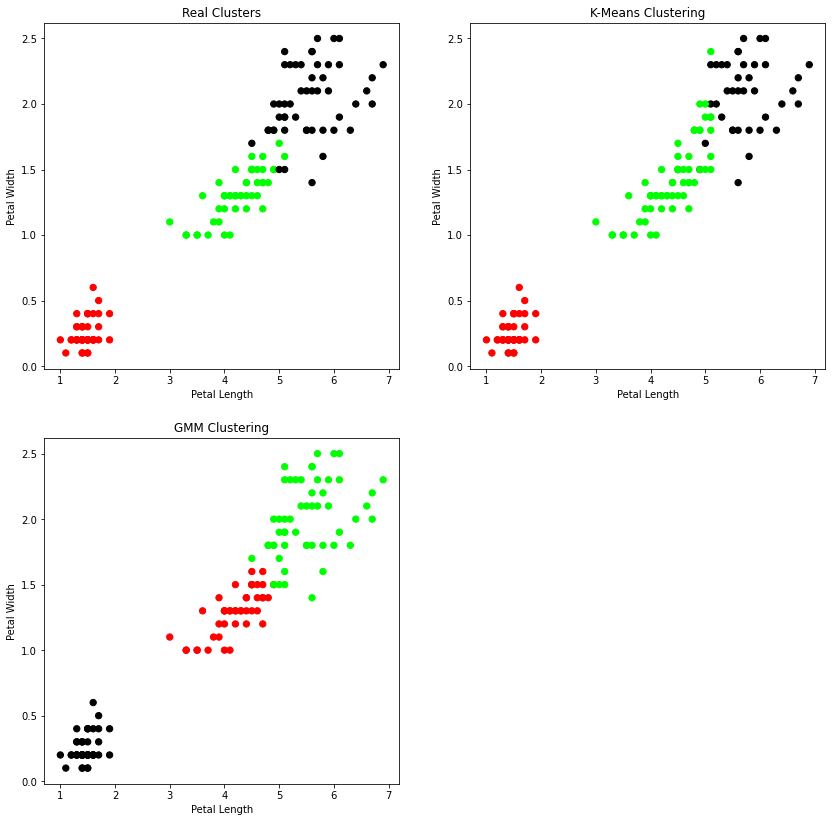

In [1]:
#program 9

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to
# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a
# mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels moreclosely than the Kmeans.')

In [5]:
#program 10


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
iris_data=iris.data
iris_labels=iris.target
#print(iris_data)
#print(iris_labels)
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape)
# Prints Label no. and their names
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
# Display the results
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test))

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [4.7 3.2 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.5 2.5 4.  1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [4.4 2.9 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2  Predicted-label: 2
 Sample: [6.8 3.2 5.9 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [5.6 3.  4.1 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.2 2.7 3.9 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [7.9 3.8 6.4 2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [6.8 2.8 4.8 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [6.1 2.9 4.7 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [5.  3.3 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.5 2.3 4. 

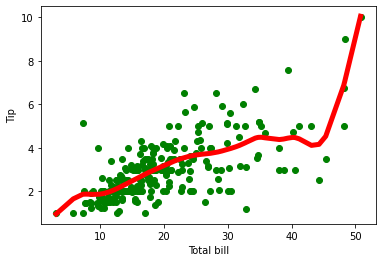

In [10]:
#program 11

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
# load data points
data = pd.read_csv('11.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localWeightRegression(X,mtip,2) # increase k to get smooth curves
graphPlot(X,ypred)

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


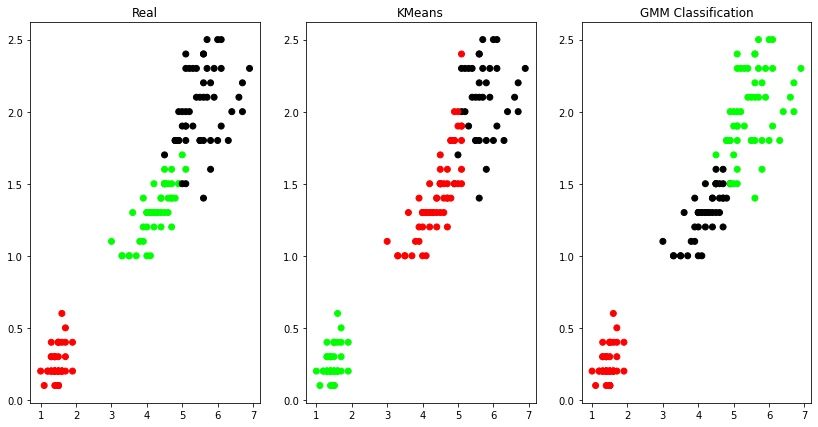

In [11]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

dataset = pd.read_csv("9.csv", names=names)

X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))